In [23]:
import os
import re
import json
import random
import collections
from pprint import pprint
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import scipy

from pprint import pprint
from natsort import natsorted, index_natsorted, order_by_index
import scipy
from scipy import interp
from sklearn import preprocessing

from sklearn import random_projection

from eztrack.fragility.linearsystem import DiscreteLinearSystem
from eztrack.fragility.perturbationmodel import MinNormPerturbModel

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sample_unit_ball(N, d, radius=1, simplify=False):
    # sample from the surface of the unit ball
    samps = sample_unit_sphere(N, d)

    # sample from the radius pdf
    _samps = np.random.uniform(0, radius, (N, 1))
    r = _samps**(1/d)  # convert uniform sample to radius sample
    
    # scale samples by the radius pdf -> project to closure of unit ball
    samps = samps / r
    
    # simple sample d+1-dim sphere, and then drop two dimensions
    if simplify:
        samps = sample_unit_sphere(N, d+1)
        samps = samps[:, :-1]
    
    return samps

def sample_unit_sphere(N, d):
    # sample N d-dim vectors on uniform interval
    samps = np.random.normal(0, 1, (N, d))

    # normalize by length of each vector
    lengths = np.linalg.norm(samps, axis=1, keepdims=True)
    samps = samps / lengths
    return samps

In [3]:
def upper_tri_indexing(A):
    m = A.shape[0]
    r,c = np.triu_indices(m,1)
    return A[r,c]

In [4]:
def generate_random_line():
    b_hat = b / np.linalg.norm(b)    #unit vector of b
    return b_hat

def project_onto_line(p, b_hat):
    proj_p_onto_b = p.dot(b_hat)*b_hat
    return proj_p_onto_b

# Numerical Experiment - Structured Column/Row Perturbations of a Random Matrix

In [7]:
model_kwargs = {
    'radius': 1.05,
    'perturb_type': 'C',
    'method_to_use': 'dc',
}
pert_model = MinNormPerturbModel(**model_kwargs)

(1950,)


Text(0, 0.5, 'Operator Norm')

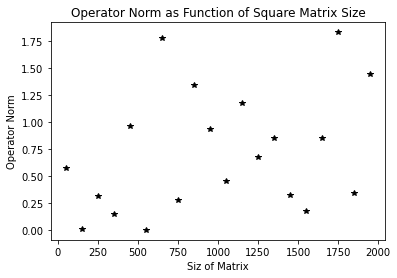

In [9]:
mean = 0
variance = 1

m_list = np.arange(50, 100, 10)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))
    
    # create a fit to the norm
    minnorm = pert_model.fit(A)
    
    # compute spectral norm
#     norm = np.linalg.norm(A, ord=2)
    norms.append(minnorm.max() - minnorm.min())

print(minnorm.shape)
fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Square Matrix Size")
ax.set_xlabel("Siz of Matrix")
ax.set_ylabel("Operator Norm")

(1950,)


Text(0, 0.5, 'Operator Norm')

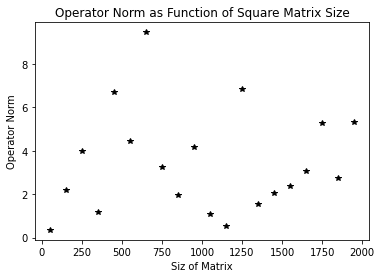

In [10]:
mean = 0
variance = 5

m_list = np.arange(50, 2000, 100)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))
    
    # create a fit to the norm
    minnorm = pert_model.fit(A, ek=0)
    
    # compute spectral norm
#     norm = np.linalg.norm(A, ord=2)
    norms.append(minnorm[0])

print(minnorm.shape)
fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Square Matrix Size")
ax.set_xlabel("Siz of Matrix")
ax.set_ylabel("Operator Norm")

(1950,)


Text(0, 0.5, 'Operator Norm')

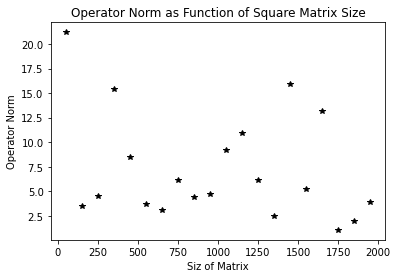

In [11]:
mean = 0
variance = 10

m_list = np.arange(50, 2000, 100)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))
    
    # create a fit to the norm
    minnorm = pert_model.fit(A, ek=0)
    
    # compute spectral norm
#     norm = np.linalg.norm(A, ord=2)
    norms.append(minnorm[0])

print(minnorm.shape)
fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Square Matrix Size")
ax.set_xlabel("Siz of Matrix")
ax.set_ylabel("Operator Norm")

# Relative Perturbation Norms as a Function of Size

(295,)


Text(0, 0.5, 'Operator Norm')

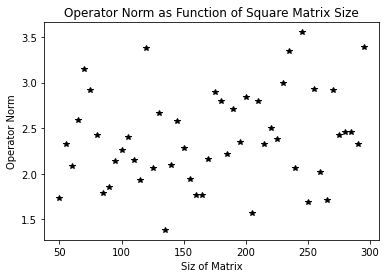

In [14]:
mean = 0
variance = 1

m_list = np.arange(50, 300, 5)
norms = []
for m in m_list:
    # generate sub-gaussian matrix with independent entries
    A = np.random.normal(loc=mean, scale=variance, size=(m, m))
    
    # create a fit to the norm
    minnorm = pert_model.fit(A)
    
    # compute spectral norm
#     norm = np.linalg.norm(A, ord=2)
    norms.append(minnorm.max() - minnorm.min())

print(minnorm.shape)
fig, ax = plt.subplots(1,1)
ax.plot(m_list, norms, 'k*')
ax.set_title("Operator Norm as Function of Square Matrix Size")
ax.set_xlabel("Siz of Matrix")
ax.set_ylabel("Operator Norm")

In [32]:
mean = 0
variance = 0.2

# generate sub-gaussian matrix with independent entries
A = np.random.normal(loc=mean, scale=variance, size=(m, m))

# A[np.diag_indices(A.shape[0])] = np.random.random(A.shape[0])

<AxesSubplot:xlabel='Real part', ylabel='Imaginary part'>

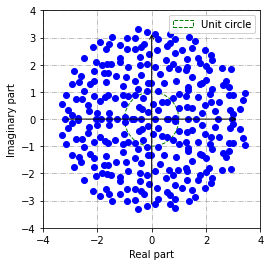

In [33]:
lds = DiscreteLinearSystem(A)

lds.plot_eigs()

<AxesSubplot:>

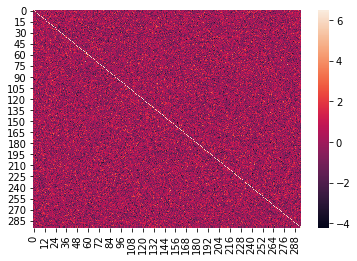

In [22]:
sns.heatmap(A)

